<h1> Mendapatkan semua image path

standard nya pakai `os` karena lebih fleksibel, kita pakai `glob` agar lebih simple

In [1]:
from glob import glob

In [5]:
fname = glob("assets/data/*/*.png")
fname[:10]

['assets/data\\0\\1.png',
 'assets/data\\0\\10.png',
 'assets/data\\0\\100.png',
 'assets/data\\0\\101.png',
 'assets/data\\0\\102.png',
 'assets/data\\0\\103.png',
 'assets/data\\0\\104.png',
 'assets/data\\0\\105.png',
 'assets/data\\0\\106.png',
 'assets/data\\0\\107.png']

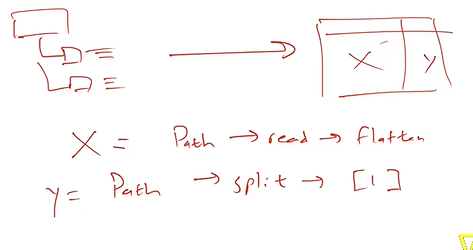

<h1> X = Path -> Image -> Flatten

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
X = np.array([plt.imread(f).flatten() for f in fname])
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
X.shape

(2000, 784)

In [18]:
X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<h1> y = Path -> split -> ambil[1]

In [13]:
# split using \ and get the 3rd element without trigger escape

y = np.array([int(f.split("\\")[1]) for f in fname])
y

array([0, 0, 0, ..., 9, 9, 9])

In [14]:
y.shape

(2000,)

In [19]:
y[:5]

array([0, 0, 0, 0, 0])

In [15]:
# kalau tidak pakai list comprehension

result = []
for i in range(1, 11):
    result.append(i)

print(result)
# append komputasinya berat, kalau comprehension lebih ringan 2x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


<h1> Join sebagai 1 dataframe lalu sv menjadi CSV

In [21]:
df = pd.DataFrame(X, columns=range(1, 785))
df.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df['label'] = y
df.head()

,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [24]:
df.to_csv("metadata.csv", index=None)